In [77]:
import warnings
warnings.filterwarnings("ignore")

In [78]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [79]:
import pandas as pd
import statsmodels.api as sm
file=pd.read_csv("C:/Users/Dharniha V/Downloads/Paper2/credit_card.csv")
df=pd.DataFrame(file)
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

# Q1. What does the primary analysis of several categorical features reveal?

In [80]:
df.shape

(8950, 18)

In [81]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [82]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [83]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [84]:
#label encoder wherever required

for i in df:
    if df[i].dtype==object:
        from sklearn.preprocessing import LabelEncoder
        label=LabelEncoder()
        df[i]=label.fit_transform(df[i])

In [85]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0           0    40.900749           0.818182      95.40              0.00   
1           1  3202.467416           0.909091       0.00              0.00   
2           2  2495.148862           1.000000     773.17            773.17   
3           3  1666.670542           0.636364    1499.00           1499.00   
4           4   817.714335           1.000000      16.00             16.00   
...       ...          ...                ...        ...               ...   
8945     8945    28.493517           1.000000     291.12              0.00   
8946     8946    19.183215           1.000000     300.00              0.00   
8947     8947    23.398673           0.833333     144.40              0.00   
8948     8948    13.457564           0.833333       0.00              0.00   
8949     8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         

In [86]:
df.dtypes

CUST_ID                               int32
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

<BarContainer object of 8950 artists>

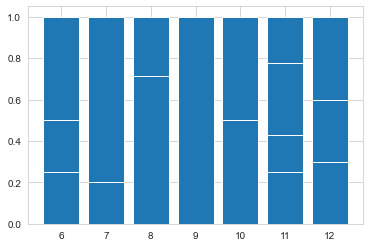

In [87]:
import matplotlib.pyplot as plt
plt.bar(df['TENURE'],height=df['PRC_FULL_PAYMENT'].values)

this bar plot shows that person who are fully paid by user are given tenure 100%

In [ ]:
plt.bar(df['CASH_ADVANCE'],height=df['TENURE'].values)

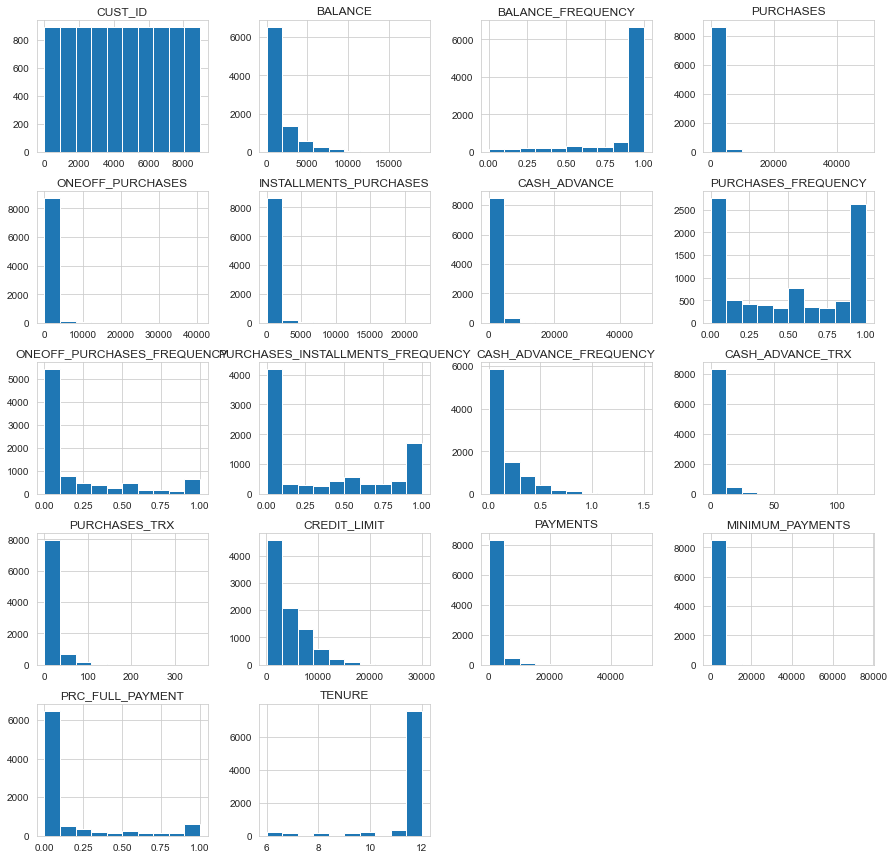

In [89]:
import matplotlib.pyplot as plt
plot=df.hist(figsize=(15,15))

<module 'seaborn' from 'C:\\Users\\Dharniha V\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

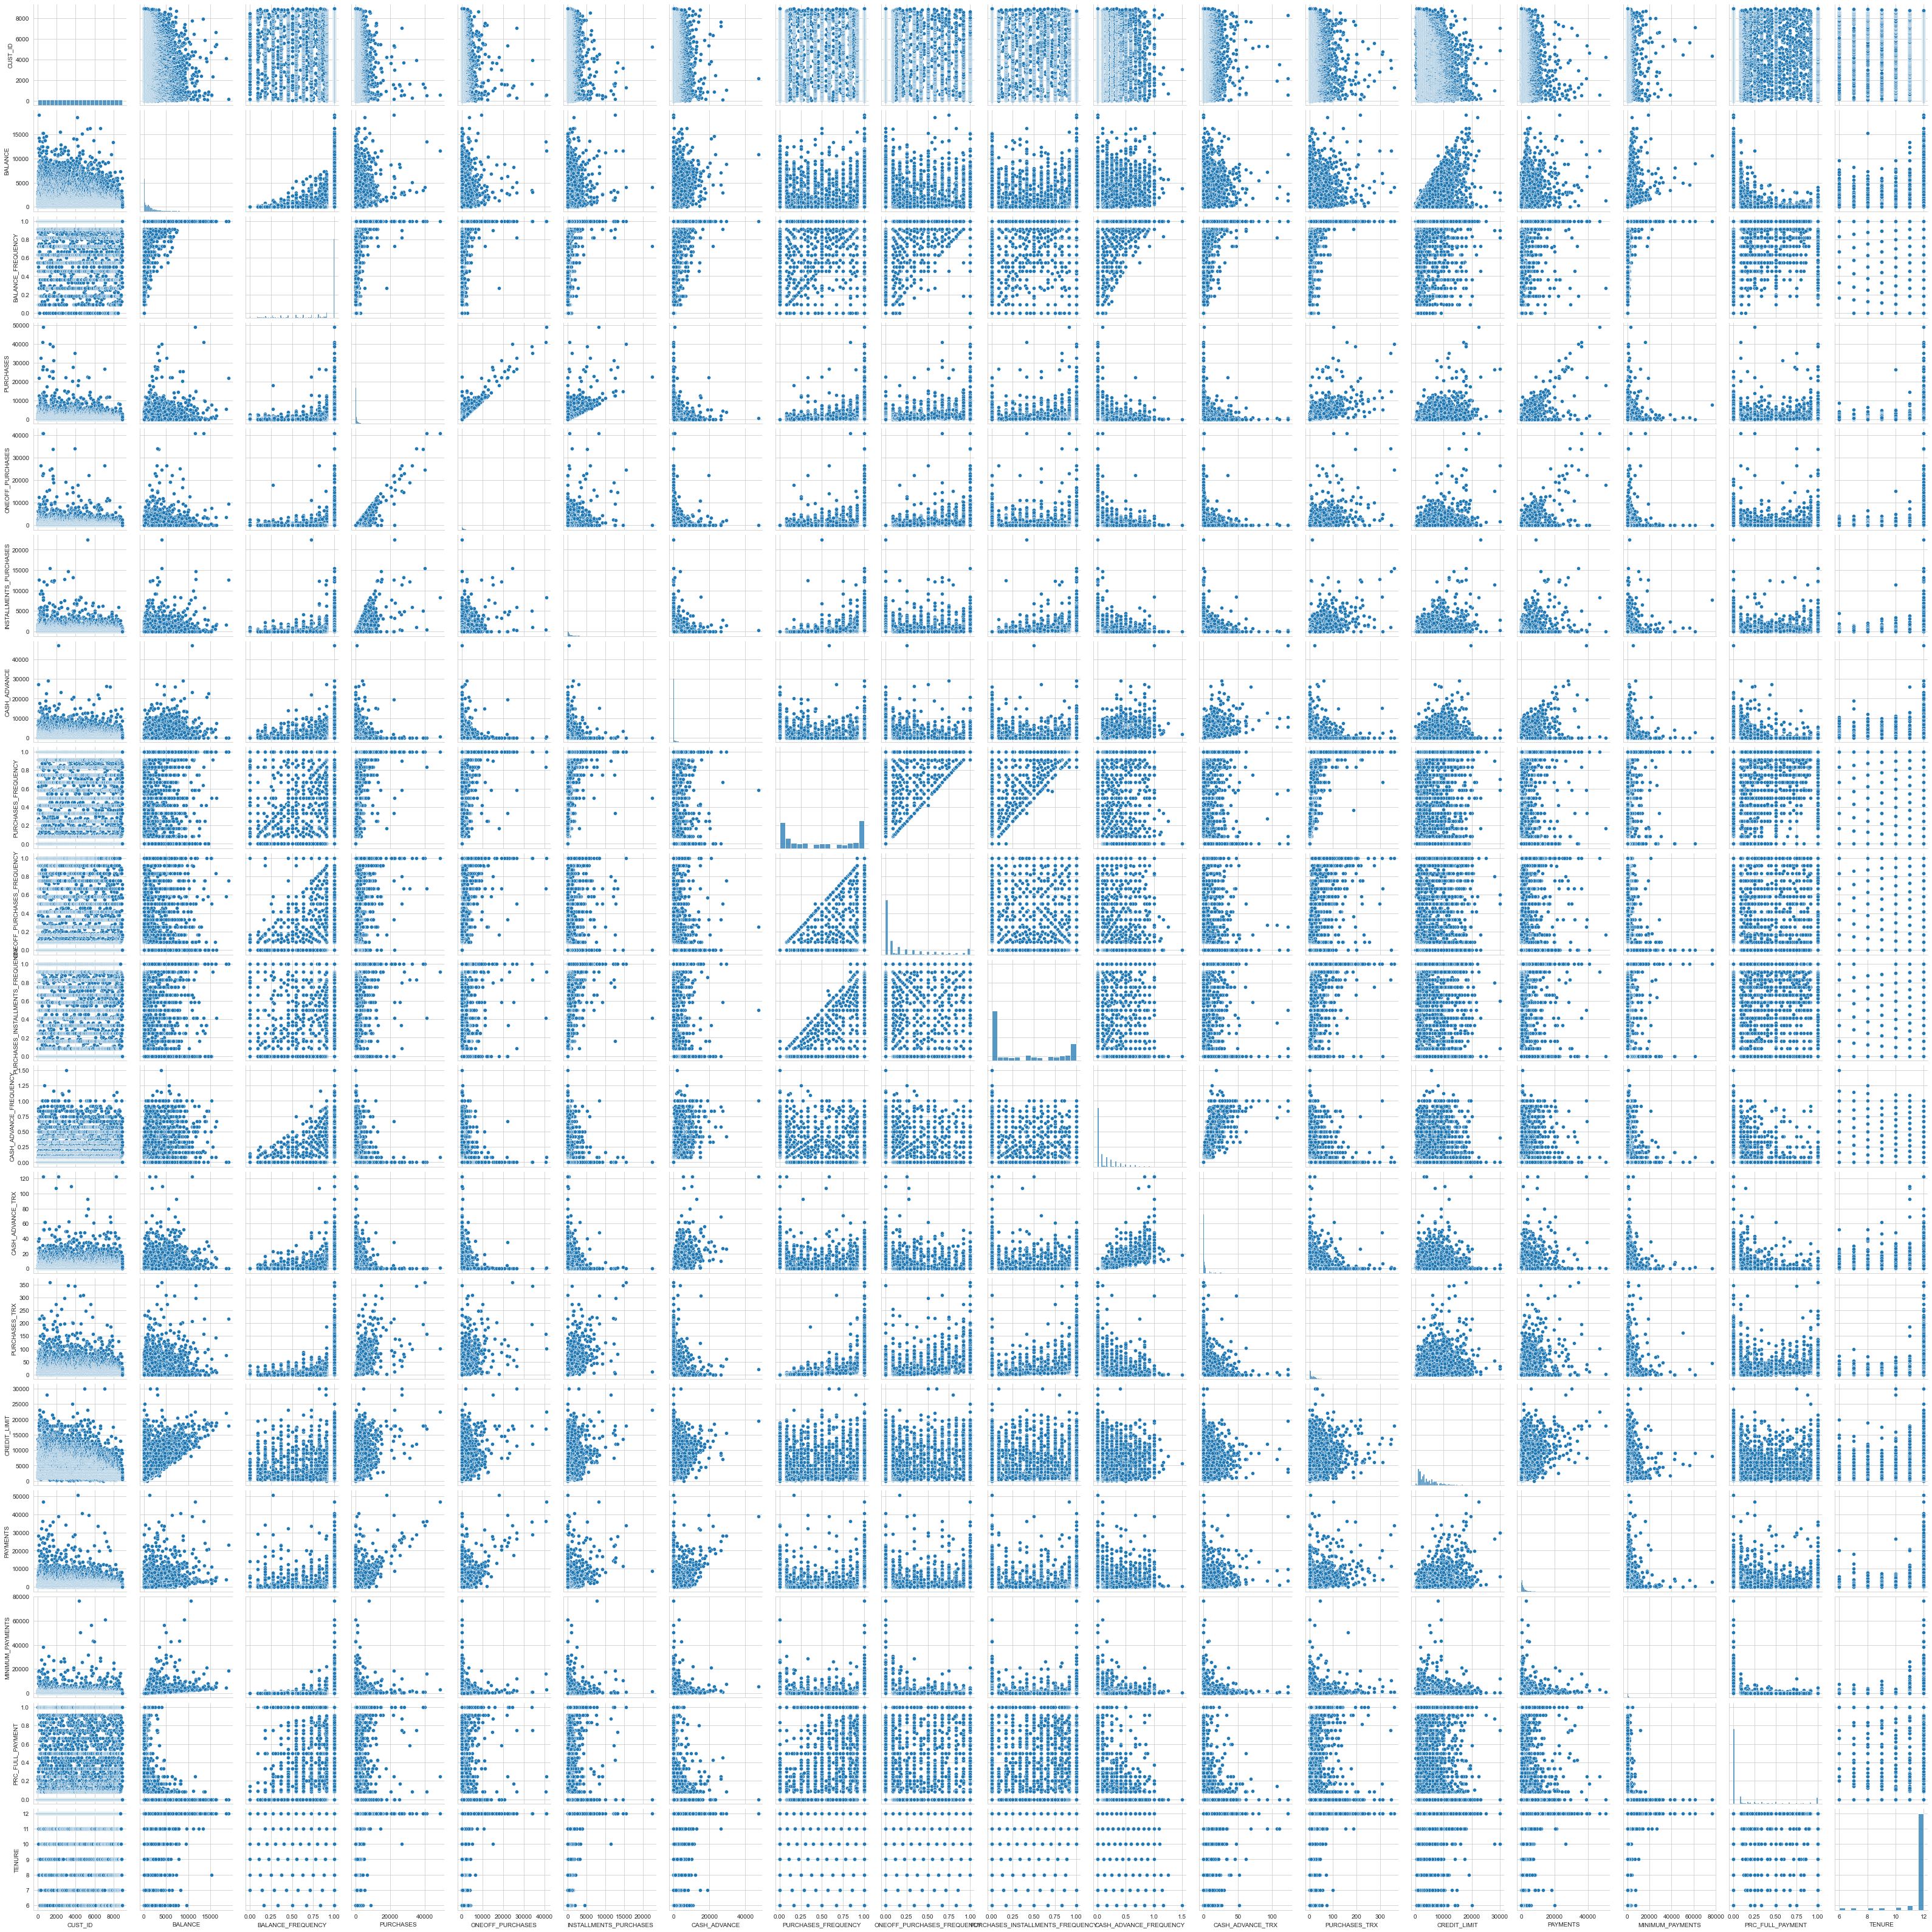

In [90]:
import seaborn as sns
sns.pairplot(df)
sns

In [91]:
df.corr()

CUST_ID   BALANCE  BALANCE_FREQUENCY  \
CUST_ID                           1.000000 -0.236863          -0.111091   
BALANCE                          -0.236863  1.000000           0.322412   
BALANCE_FREQUENCY                -0.111091  0.322412           1.000000   
PURCHASES                        -0.140745  0.181261           0.133674   
ONEOFF_PURCHASES                 -0.136465  0.164350           0.104323   
INSTALLMENTS_PURCHASES           -0.081845  0.126469           0.124292   
CASH_ADVANCE                     -0.084239  0.496692           0.099388   
PURCHASES_FREQUENCY              -0.021153 -0.077944           0.229715   
ONEOFF_PURCHASES_FREQUENCY       -0.172135  0.073166           0.202415   
PURCHASES_INSTALLMENTS_FREQUENCY  0.026535 -0.063186           0.176079   
CASH_ADVANCE_FREQUENCY           -0.025797  0.449218           0.191873   
CASH_ADVANCE_TRX                 -0.023154  0.385152           0.141555   
PURCHASES_TRX                    -0.114390  0.154338           0.189626   
CREDIT_LIMIT                     -0.353784  0.531283           0.095843   
PAYMENTS                         -0.168465  0.322802           0.065008   
MINIMUM_PAYMENTS                 -0.072678  0.398684           0.132569   
PRC_FULL_PAYMENT                  0.043029 -0.318959          -0.095082   
TENURE                           -0.180585  0.072692           0.119776   

                                  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                           -0.140745         -0.136465   
BALANCE                            0.181261          0.164350   
BALANCE_FREQUENCY                  0.133674          0.104323   
PURCHASES                          1.000000          0.916845   
ONEOFF_PURCHASES                   0.916845          1.000000   
INSTALLMENTS_PURCHASES             0.679896          0.330622   
CASH_ADVANCE                      -0.051474         -0.031326   
PURCHASES_FREQUENCY                0.393017          0.264937   
ONEOFF_PURCHASES_FREQUENCY         0.498430          0.524891   
PURCHASES_INSTALLMENTS_FREQUENCY   0.315567          0.127729   
CASH_ADVANCE_FREQUENCY            -0.120143         -0.082628   
CASH_ADVANCE_TRX                  -0.067175         -0.046212   
PURCHASES_TRX                      0.689561          0.545523   
CREDIT_LIMIT                       0.356963          0.319724   
PAYMENTS                           0.603264          0.567292   
MINIMUM_PAYMENTS                   0.093860          0.048755   
PRC_FULL_PAYMENT                   0.180379          0.132763   
TENURE                             0.086288          0.064150   

                                  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
CUST_ID                                        -0.081845     -0.084239   
BALANCE                                         0.126469      0.496692   
BALANCE_FREQUENCY                               0.124292      0.099388   
PURCHASES                                       0.679896     -0.051474   
ONEOFF_PURCHASES                                0.330622     -0.031326   
INSTALLMENTS_PURCHASES                          1.000000     -0.064244   
CASH_ADVANCE                                   -0.064244      1.000000   
PURCHASES_FREQUENCY                             0.442418     -0.215507   
ONEOFF_PURCHASES_FREQUENCY                      0.214042     -0.086754   
PURCHASES_INSTALLMENTS_FREQUENCY                0.511351     -0.177070   
CASH_ADVANCE_FREQUENCY                         -0.132318      0.628522   
CASH_ADVANCE_TRX                               -0.073999      0.656498   
PURCHASES_TRX                                   0.628108     -0.075850   
CREDIT_LIMIT                                    0.256499      0.303985   
PAYMENTS                                        0.384084      0.453238   
MINIMUM_PAYMENTS                                0.132172      0.140107   
PRC_FULL_PAYMENT                                0.182569     -0.152935   
TENURE                                   

<AxesSubplot:xlabel='TENURE', ylabel='BALANCE'>

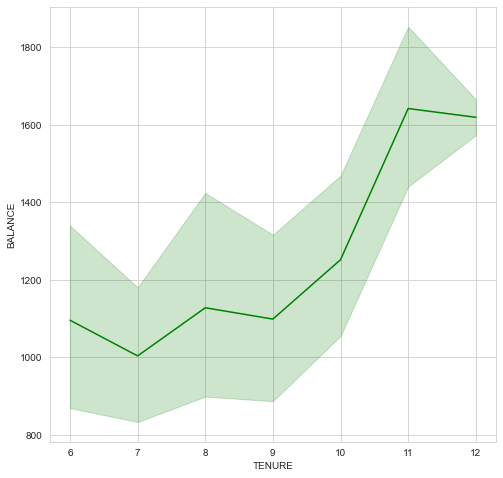

In [92]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df, x='TENURE', y='BALANCE', color='green')

THIS GRAPH SHOWS THE PERSON WHO HAVING HIGH BALANCE ARE GIVEN TENURE 

# Q2. Perform the following Exploratory Data Analysis tasks:

# a. Missing Value Analysis

In [93]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [94]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool

In [95]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [96]:

df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mode()[0],inplace=True)


In [147]:

df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mode()[0],inplace=True)

In [148]:
 df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# b. Outlier Treatment using the Z-score method

In [149]:
import numpy as np

mean = np.mean(df['TENURE'])
std = np.std(df['TENURE'])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 11.51731843575419
std. deviation is 1.3382560001966606


In [150]:
mean

11.51731843575419

In [151]:
std

1.3382560001966606

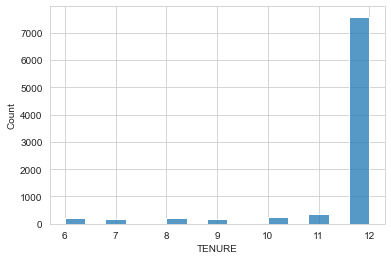

In [152]:
sns.histplot(df['TENURE'])
plt.show()

# c. Deal with correlated variableS

In [153]:
df.corr()

CUST_ID   BALANCE  BALANCE_FREQUENCY  \
CUST_ID                           1.000000 -0.236863          -0.111091   
BALANCE                          -0.236863  1.000000           0.322412   
BALANCE_FREQUENCY                -0.111091  0.322412           1.000000   
PURCHASES                        -0.140745  0.181261           0.133674   
ONEOFF_PURCHASES                 -0.136465  0.164350           0.104323   
INSTALLMENTS_PURCHASES           -0.081845  0.126469           0.124292   
CASH_ADVANCE                     -0.084239  0.496692           0.099388   
PURCHASES_FREQUENCY              -0.021153 -0.077944           0.229715   
ONEOFF_PURCHASES_FREQUENCY       -0.172135  0.073166           0.202415   
PURCHASES_INSTALLMENTS_FREQUENCY  0.026535 -0.063186           0.176079   
CASH_ADVANCE_FREQUENCY           -0.025797  0.449218           0.191873   
CASH_ADVANCE_TRX                 -0.023154  0.385152           0.141555   
PURCHASES_TRX                    -0.114390  0.154338           0.189626   
CREDIT_LIMIT                     -0.353792  0.531296           0.095931   
PAYMENTS                         -0.168465  0.322802           0.065008   
MINIMUM_PAYMENTS                 -0.070597  0.397997           0.131576   
PRC_FULL_PAYMENT                  0.043029 -0.318959          -0.095082   
TENURE                           -0.180585  0.072692           0.119776   

                                  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                           -0.140745         -0.136465   
BALANCE                            0.181261          0.164350   
BALANCE_FREQUENCY                  0.133674          0.104323   
PURCHASES                          1.000000          0.916845   
ONEOFF_PURCHASES                   0.916845          1.000000   
INSTALLMENTS_PURCHASES             0.679896          0.330622   
CASH_ADVANCE                      -0.051474         -0.031326   
PURCHASES_FREQUENCY                0.393017          0.264937   
ONEOFF_PURCHASES_FREQUENCY         0.498430          0.524891   
PURCHASES_INSTALLMENTS_FREQUENCY   0.315567          0.127729   
CASH_ADVANCE_FREQUENCY            -0.120143         -0.082628   
CASH_ADVANCE_TRX                  -0.067175         -0.046212   
PURCHASES_TRX                      0.689561          0.545523   
CREDIT_LIMIT                       0.356977          0.319735   
PAYMENTS                           0.603264          0.567292   
MINIMUM_PAYMENTS                   0.095840          0.050294   
PRC_FULL_PAYMENT                   0.180379          0.132763   
TENURE                             0.086288          0.064150   

                                  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
CUST_ID                                        -0.081845     -0.084239   
BALANCE                                         0.126469      0.496692   
BALANCE_FREQUENCY                               0.124292      0.099388   
PURCHASES                                       0.679896     -0.051474   
ONEOFF_PURCHASES                                0.330622     -0.031326   
INSTALLMENTS_PURCHASES                          1.000000     -0.064244   
CASH_ADVANCE                                   -0.064244      1.000000   
PURCHASES_FREQUENCY                             0.442418     -0.215507   
ONEOFF_PURCHASES_FREQUENCY                      0.214042     -0.086754   
PURCHASES_INSTALLMENTS_FREQUENCY                0.511351     -0.177070   
CASH_ADVANCE_FREQUENCY                         -0.132318      0.628522   
CASH_ADVANCE_TRX                               -0.073999      0.656498   
PURCHASES_TRX                                   0.628108     -0.075850   
CREDIT_LIMIT                                    0.256515      0.303997   
PAYMENTS                                        0.384084      0.453238   
MINIMUM_PAYMENTS                                0.134071      0.140780   
PRC_FULL_PAYMENT                                0.182569     -0.152935   
TENURE                                   

<AxesSubplot:>

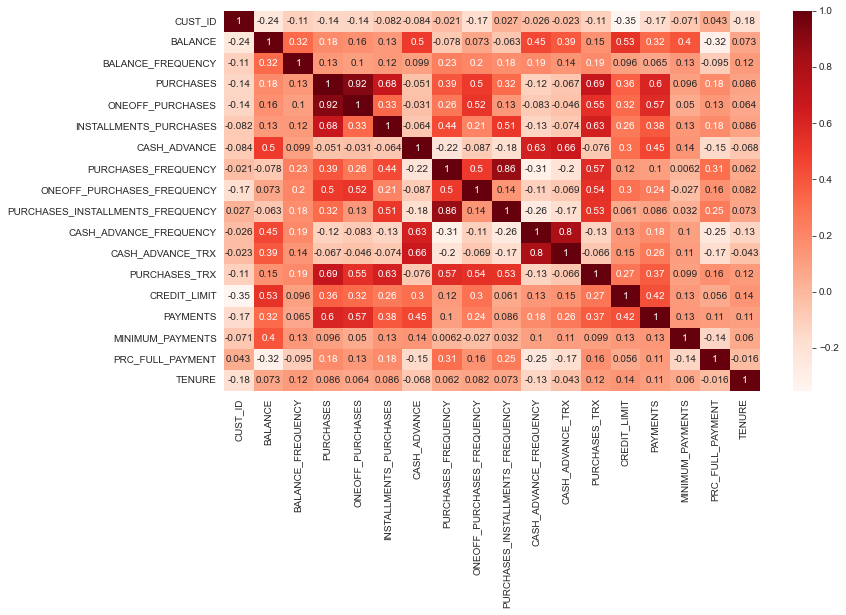

In [154]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Reds')

# Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [155]:
y=df['TENURE']
y

0       12
1       12
2       12
3       12
4       12
        ..
8945     6
8946     6
8947     6
8948     6
8949     6
Name: TENURE, Length: 8950, dtype: int64

In [200]:
df.drop(['CUST_ID'],axis=1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0      201.802084        139.509787          0.000000      12   
1     4103.032597       1072.340217          0.222222      12   
2      622.066742        627.284787          0.000000      12   
3        0.000000        299.351881          0.000000      12   
4      678.334763        244.791237          0.000000      12   
...           ...               ...               ...     ...   
8945   325.594462         48.886365          0.500000       6   
8946   275.861322        299.351881          0.000000       6   
8

In [201]:
x=df.drop(['TENURE'],axis=1)
x

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0           0    40.900749           0.818182      95.40              0.00   
1           1  3202.467416           0.909091       0.00              0.00   
2           2  2495.148862           1.000000     773.17            773.17   
3           3  1666.670542           0.636364    1499.00           1499.00   
4           4   817.714335           1.000000      16.00             16.00   
...       ...          ...                ...        ...               ...   
8945     8945    28.493517           1.000000     291.12              0.00   
8946     8946    19.183215           1.000000     300.00              0.00   
8947     8947    23.398673           0.833333     144.40              0.00   
8948     8948    13.457564           0.833333       0.00              0.00   
8949     8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  Group or Clustter  
0      201.802084        139.509787          0.000000                  0  
1     4103.032597       1072.340217          0.222222                  1  
2      622.066742        627.284787          0.000000                  1  
3        0.000000        299.351881          0.000000                  1  
4      678.334763        244.791237          0.000000                  0  
...           ...       

In [202]:
#label encoder wherever required

for i in df:
    if df[i].dtype==object:
        from sklearn.preprocessing import LabelEncoder
        label=LabelEncoder()
        df[i]=label.fit_transform(df[i])

In [203]:
x=df.drop(['TENURE'],axis=1)
y=df['TENURE']

In [204]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.60,random_state=47)

In [205]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [206]:
model.fit(x_train,y_train)
predicted_y=model.predict(x_test)
predicted_y

array([12, 12, 12, ..., 12, 12, 12], dtype=int64)

In [207]:
model.fit(x_train,y_train)
predicted_y=model.predict(x_test)
predicted_y

array([12, 12, 12, ..., 12, 12, 12], dtype=int64)

In [208]:
y_pred=model.predict(x_test)
model.predict_proba(x_test)

array([[1.92791616e-04, 1.28105305e-04, 9.30301419e-04, ...,
        2.46902520e-03, 9.03956182e-03, 9.87045233e-01],
       [7.91597414e-06, 3.43444840e-06, 3.93992703e-05, ...,
        1.15597348e-03, 1.85029091e-03, 9.96935314e-01],
       [1.52386187e-04, 4.63351469e-05, 1.69575205e-04, ...,
        1.65222696e-02, 1.05336783e-02, 9.72461913e-01],
       ...,
       [2.36093666e-04, 5.67272146e-05, 6.29353356e-04, ...,
        1.36946702e-03, 1.82869765e-02, 9.78659136e-01],
       [8.69516204e-03, 5.51165222e-03, 1.23962631e-02, ...,
        7.96800452e-02, 9.29234708e-02, 7.91600897e-01],
       [5.49868165e-02, 3.80474228e-02, 3.50361259e-02, ...,
        3.80415112e-02, 2.71454713e-02, 7.75599528e-01]])

In [209]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8448789571694599

In [210]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[   2,    1,    0,    0,    0,    0,  109],
       [   1,    0,    0,    0,    0,    0,  111],
       [   2,    0,    0,    0,    0,    0,  121],
       [   0,    0,    0,    0,    0,    0,  111],
       [   4,    0,    0,    0,    0,    0,  126],
       [   1,    0,    0,    0,    0,    1,  226],
       [  12,    2,    0,    2,    2,    2, 4534]], dtype=int64)

In [211]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           6       0.09      0.02      0.03       112\n           7       0.00      0.00      0.00       112\n           8       0.00      0.00      0.00       123\n           9       0.00      0.00      0.00       111\n          10       0.00      0.00      0.00       130\n          11       0.33      0.00      0.01       228\n          12       0.85      1.00      0.92      4554\n\n    accuracy                           0.84      5370\n   macro avg       0.18      0.15      0.14      5370\nweighted avg       0.74      0.84      0.78      5370\n'

In [212]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)

In [213]:
pca.fit(x_train)

PCA(n_components=0.95)

In [214]:
x_train_transformed=pca.transform(x_train)
print(x_train_transformed.shape)

(3580, 6)


In [215]:
x_test_transformed=pca.transform(x_test)
print(x_test_transformed.shape)

(5370, 6)


In [216]:
new_model=LogisticRegression(penalty='l1',solver='liblinear')

In [217]:
new_model.fit(x_train_transformed,y_train)
new_prediction=new_model.predict(x_test_transformed)

In [218]:
from sklearn.metrics import accuracy_score
new_accuracy=accuracy_score(new_prediction,y_test)

In [219]:
new_accuracy

0.8480446927374302

In [177]:
from sklearn.metrics import precision_score
new_accuracy=precision_score(new_prediction,y_test,average='micro')

In [178]:
new_accuracy

0.8480446927374302

# Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [179]:
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples


In [180]:
km=KMeans(7)

In [191]:
km=KMeans(n_clusters=3,random_state=42)
km.fit_predict(x)

array([0, 1, 1, ..., 0, 0, 0])

In [182]:
wcss=[]  #With in cluster sum of squares

for i in range(2,7):
  kmeans=KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                tol=0.0001,  
                verbose=0, 
                random_state=None, 
                copy_x=True,  
                algorithm='auto')
  
  kmeans.fit(df)

  wcss.append(kmeans.inertia_)

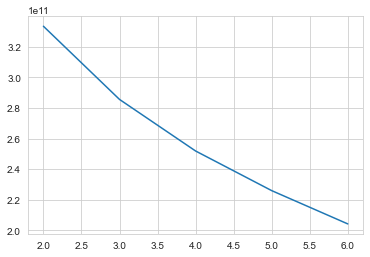

In [188]:
import matplotlib.pyplot as plt

plt.plot(range(2,7),wcss)  #Elbow Graph

# Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [192]:
score=silhouette_score(x,km.labels_,metric='euclidean')

In [193]:
print('Silhouette_score %.3f'%score)

Silhouette_score 0.380


In [187]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


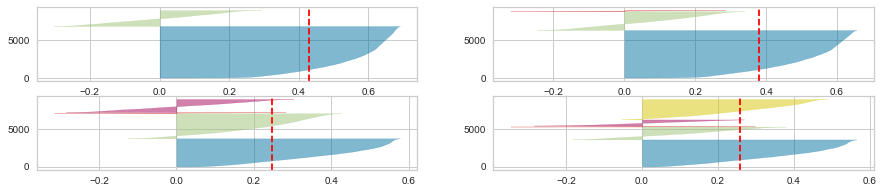

In [190]:
import yellowbrick
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig,ax=plt.subplots(2,2,figsize=(15,3))
for i in[2,3,4,5]:
    '''
     Create KMeans instance for different number of clusters
     '''
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=100,random_state=42)
    q,mod=divmod(i,2)
    
    #create silhouettevisualization instance with kmeans instance
    #Fit the visualizer
    
    visualizer=SilhouetteVisualizer(km,colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(df)

In [195]:
df['Group or Clustter']=km.fit_predict(df)
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        0    40.900749           0.818182      95.40              0.00   
1        1  3202.467416           0.909091       0.00              0.00   
2        2  2495.148862           1.000000     773.17            773.17   
3        3  1666.670542           0.636364    1499.00           1499.00   
4        4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Group or Clustter  
0   201.802084        139.509787          0.000000      12                  0  
1  4103.032597       1072.340217          0.222222      12                  1  
2   622.066742        627.284787          0.000000      12                  1  
3     0.000000        299.351881          0.000000      12                  1  
4   678.334763        244.791237          0.000000      12                  0

In [197]:
df['Group or Clustter'].value_counts()

0    6313
1    2498
2     139
Name: Group or Clustter, dtype: int64

# specify the number of observations in each cluster using a bar ploT

<BarContainer object of 8950 artists>

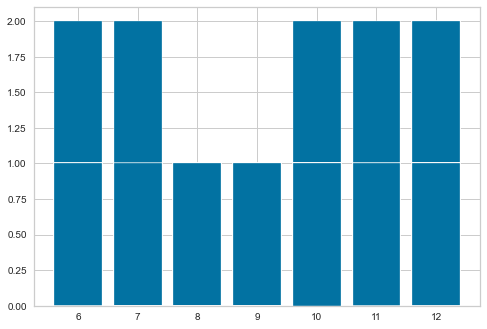

In [199]:
import matplotlib.pyplot as plt
plt.bar(df['TENURE'],height=df['Group or Clustter'].values)